In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# for the Q-Q plots
import scipy.stats as stats
%matplotlib inline

In [5]:
data = pd.read_csv(r'C:\Users\vinay krishna\Documents\semister 2\applied machine learning\project 2\train.csv')  # set a seed for reproducibility
test = pd.read_csv(r'C:\Users\vinay krishna\Documents\semister 2\applied machine learning\project 2\test.csv')
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,...,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,...,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,...,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,...,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,...,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [7]:
data.describe()
#we can see that for many variable there is vast difference between values at 25,75 percentiles and min and max values they might be outliers or entry errors

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,24846.000000,22459.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,...,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000
mean,141868.788095,-0.042032,0.019074,-0.055260,0.029289,-0.031085,-0.008175,-0.026007,0.014152,-0.017939,...,0.004708,0.006116,-0.004320,-0.005632,0.003193,0.001730,0.003160,-0.000100,91.698618,0.009820
std,82016.035976,2.061469,1.722647,1.730072,1.482053,1.616062,1.413044,1.620777,1.236557,1.140772,...,0.753043,0.728869,0.622440,0.602507,0.518214,0.483415,0.455299,0.314326,310.349300,0.098613
min,32.000000,-37.054295,-39.818310,-48.325589,-5.231828,-113.743307,-19.996349,-37.060311,-39.688571,-11.126624,...,-21.620120,-8.887017,-23.222016,-2.759942,-4.930750,-1.658162,-7.976100,-15.430084,0.000000,0.000000
25%,70705.000000,-0.941997,-0.611444,-0.918977,-0.853705,-0.705745,-0.778707,-0.565469,-0.207270,-0.659425,...,-0.225318,-0.528751,-0.163086,-0.363609,-0.310198,-0.325839,-0.069698,-0.053829,5.470000,0.000000
50%,141887.000000,0.002750,0.068992,0.163070,-0.006193,-0.070299,-0.279575,0.032157,0.026507,-0.056063,...,-0.026834,0.016988,-0.011396,0.036837,0.020346,-0.049872,0.001493,0.010855,21.990000,0.000000
75%,212513.500000,1.309469,0.825253,1.016704,0.759149,0.598372,0.402585,0.569205,0.335042,0.586035,...,0.192690,0.533115,0.147343,0.433292,0.352613,0.241366,0.093725,0.079364,77.900000,0.000000
max,284781.000000,2.418267,19.167239,3.862590,15.304184,28.762671,73.301626,120.589494,19.587773,8.918202,...,27.202839,8.272233,17.606637,4.584549,4.554683,3.415636,31.612198,15.522649,25691.160000,1.000000


In [8]:
xvariables = [
    var for var in data.columns if var not in ['Target','Id']
    
]


In [9]:
data.isnull().sum()
#only v1 and v20 have null values

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

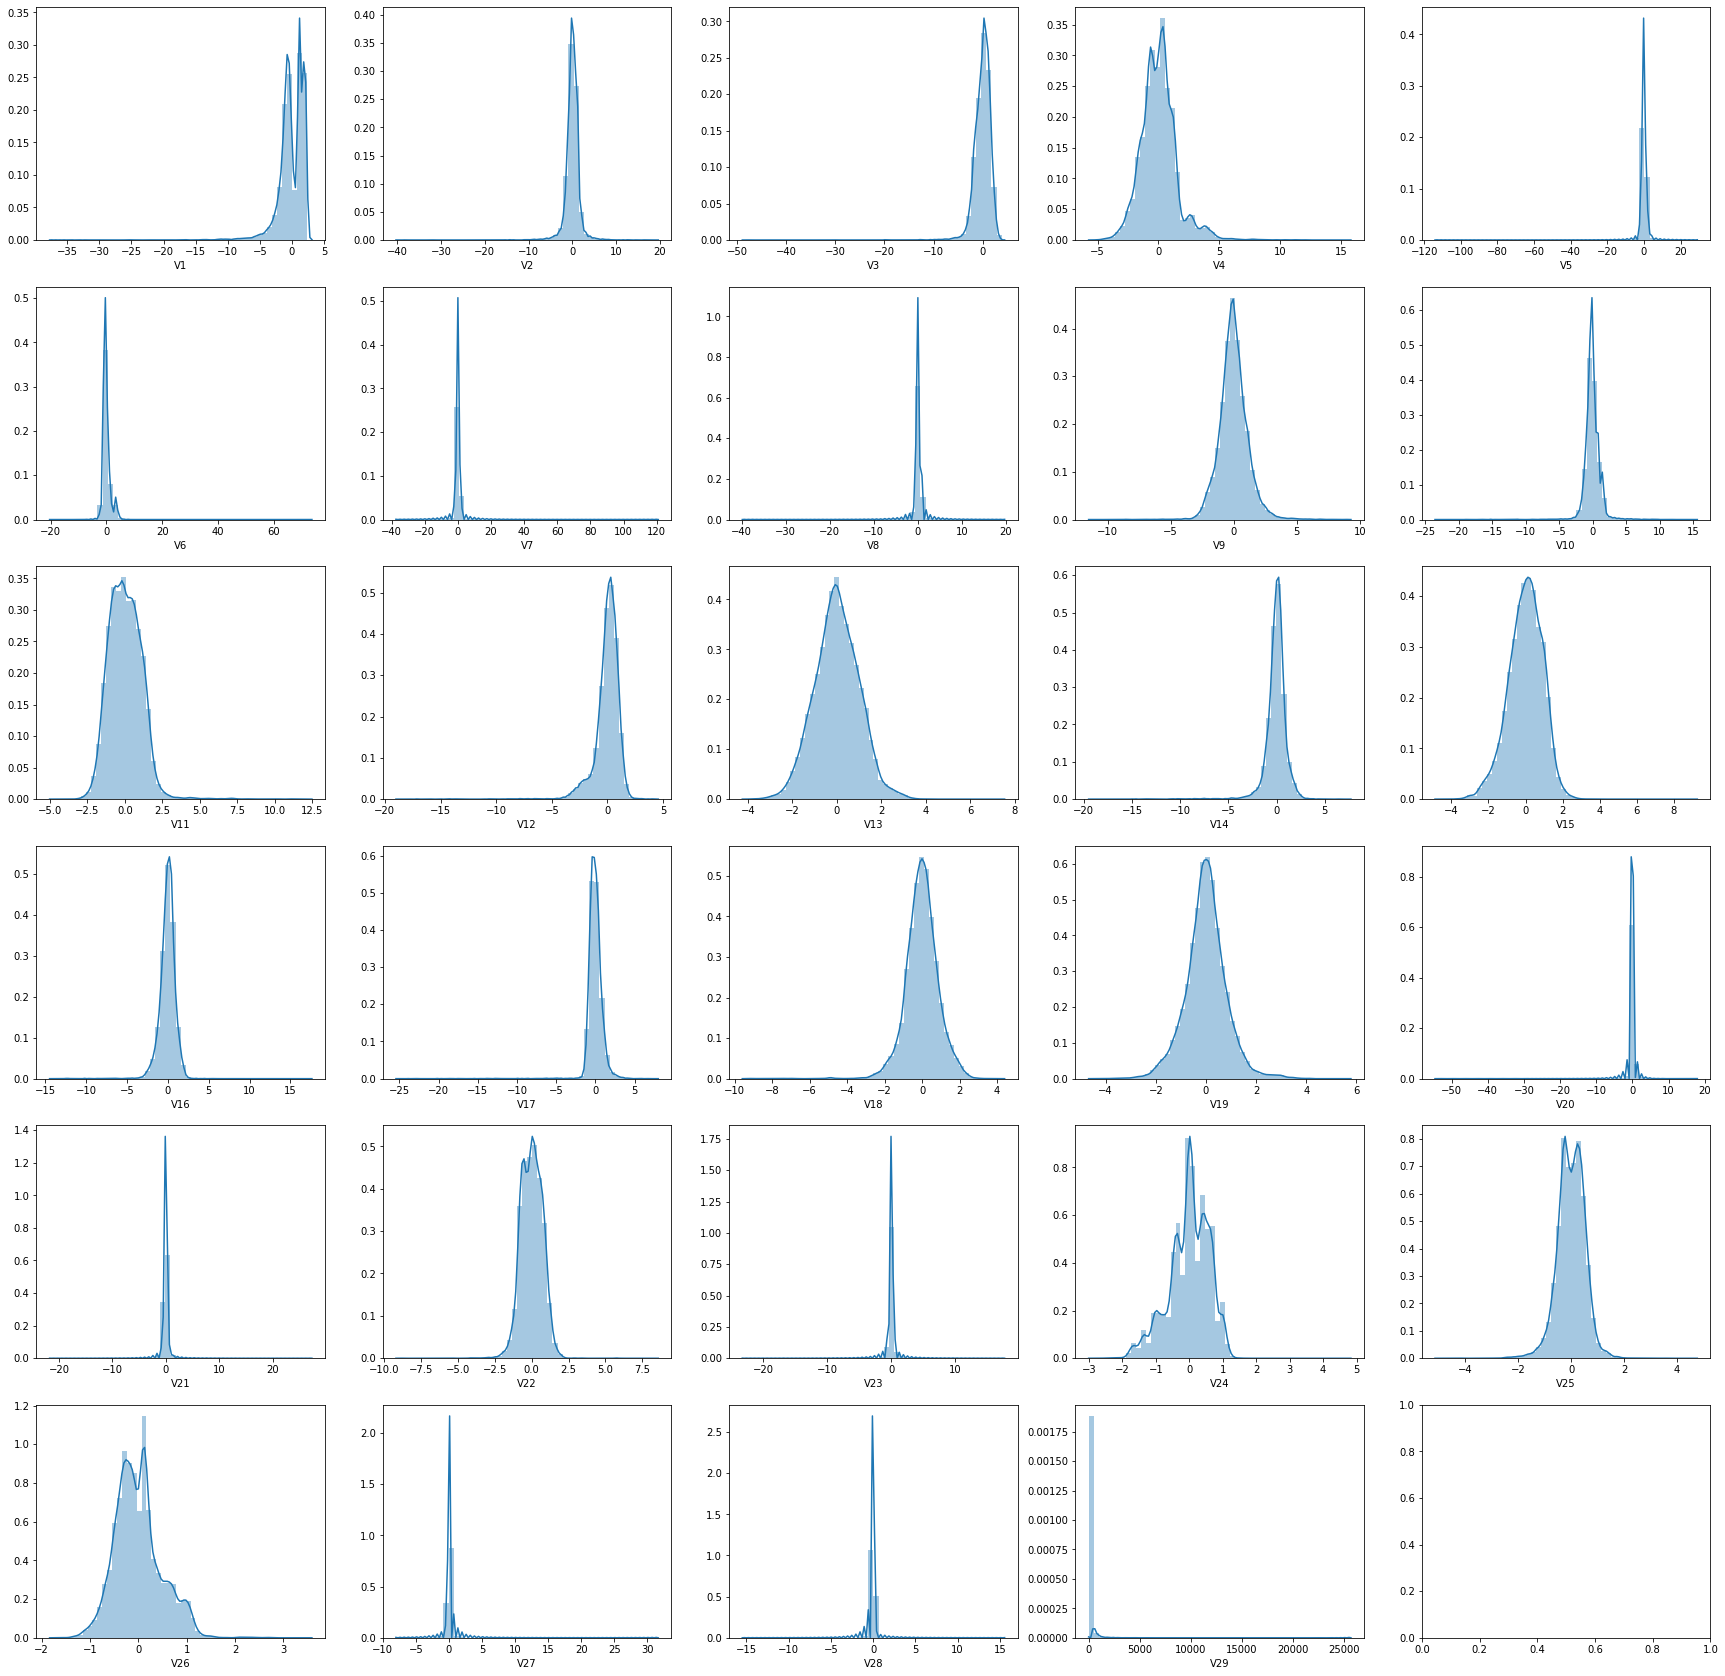

In [10]:
#based on these plots we can observe boundaries within which most of the values are present and we can also observe normality
fig, axs = plt.subplots(ncols=5, nrows=6,figsize=(30,30))
axs = axs.flatten()

for i, var in enumerate(xvariables):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);
    #we can add dummy variable for bymodel dist

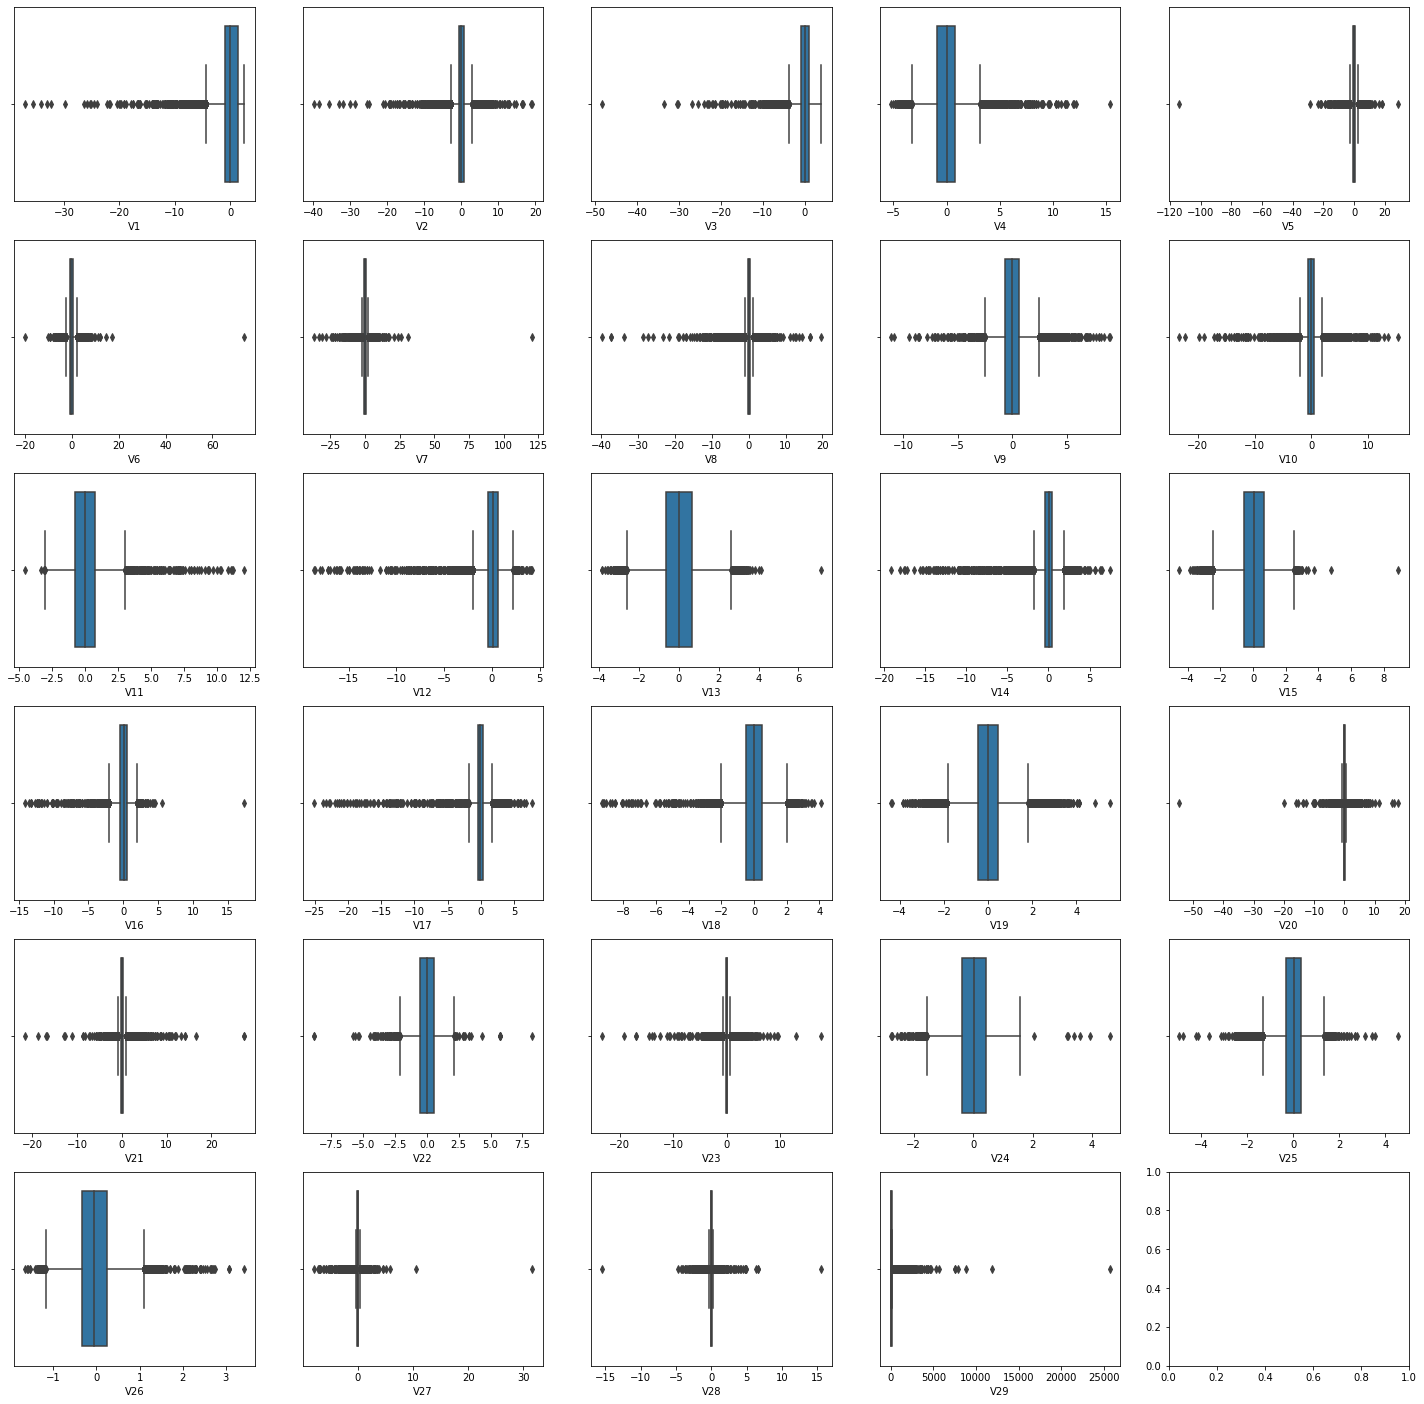

In [11]:
fig, axs = plt.subplots(ncols=5, nrows=6,figsize=(25,25))
axs = axs.flatten()

for i, var in enumerate(xvariables):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

# dividing into train and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id','Target'], axis=1),  # predictors
    data['Target'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((17392, 29), (7454, 29))

In [13]:
test_data=test.drop(['Id'], axis=1)
test_data.shape

(24846, 29)

# Handling outliers

In [14]:
from feature_engine.outlier_removers import Winsorizer
winsorizer = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries 
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=xvariables)

winsorizer.fit(X_train)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                      'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
                      'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                      'V26', 'V27', 'V28', 'V29'])

In [15]:
X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)
test_data=winsorizer.transform(test_data)
                               
                               


In [16]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,15730.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,...,15635.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000,17392.000000
mean,0.041439,0.065544,-0.010829,0.000654,-0.013451,-0.098679,0.003502,0.073941,-0.025462,-0.038370,...,-0.022148,-0.012117,0.012444,-0.005681,-0.005083,0.006044,-0.002079,0.014705,0.010890,52.226803
std,1.625546,1.158890,1.404604,1.337533,1.088343,1.017680,0.887639,0.491577,1.027753,0.848170,...,0.325883,0.326470,0.704000,0.271634,0.592244,0.490710,0.470334,0.168996,0.126968,62.608499
min,-4.326811,-2.760128,-3.858388,-3.293622,-2.655021,-2.552608,-2.264976,-1.019895,-2.514007,-2.031668,...,-0.743576,-0.853033,-2.109887,-0.634489,-1.561841,-1.305709,-1.175773,-0.318990,-0.256025,0.000000
25%,-0.946255,-0.606529,-0.936735,-0.853848,-0.701115,-0.779193,-0.560211,-0.208653,-0.651983,-0.539931,...,-0.212101,-0.225458,-0.521650,-0.164887,-0.364960,-0.311107,-0.326913,-0.070121,-0.054137,5.370000
50%,-0.010985,0.070827,0.150087,0.006725,-0.065683,-0.275188,0.038114,0.028694,-0.053166,-0.095286,...,-0.059063,-0.023740,0.020356,-0.011297,0.034056,0.016664,-0.050468,0.001639,0.010094,21.500000
75%,1.307448,0.829203,1.011034,0.772668,0.601489,0.403083,0.576299,0.332175,0.589367,0.454561,...,0.142216,0.192926,0.537175,0.148182,0.432960,0.351961,0.238994,0.095792,0.080456,78.000000
max,2.418267,2.982802,3.862590,3.212442,2.555395,2.176498,2.281064,1.143417,2.451392,1.946298,...,0.673692,0.820501,2.125413,0.617784,1.629841,1.346563,1.087854,0.344661,0.282344,186.945000


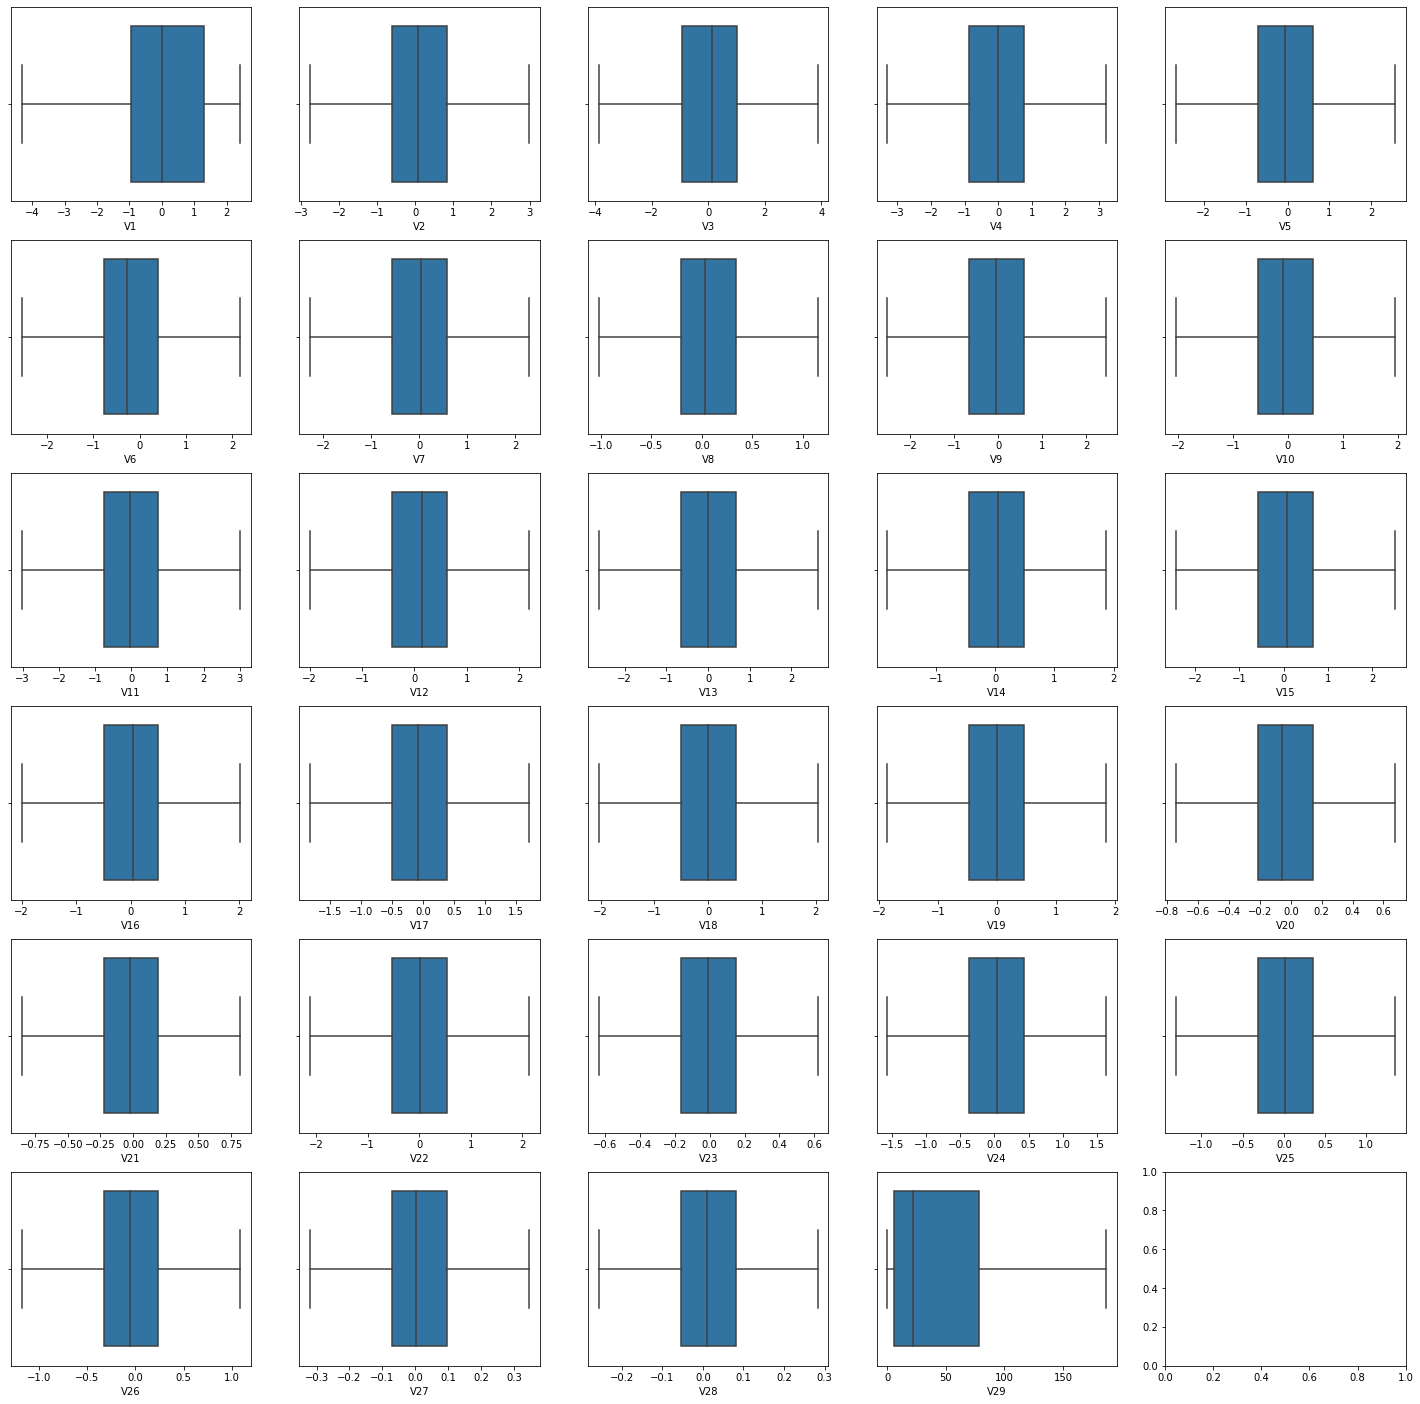

In [17]:
#By these box plots we can say that all outliers are handled
fig, axs = plt.subplots(ncols=5, nrows=6,figsize=(25,25))
axs = axs.flatten()

for i, var in enumerate(X_train[xvariables]):
    sns.boxplot(X_train[X_train[var].notnull()][var], ax=axs[i], orient='h');

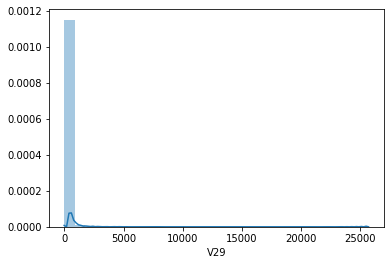

In [18]:
sns.distplot(data['V29'], bins=30)

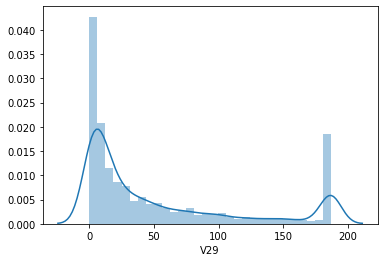

In [19]:
sns.distplot(X_train['V29'], bins=30)

In [20]:
data.corr()
# no two variables have correlation more than + or - 0.6 

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
Id,1.000000,0.113209,-0.018078,-0.344400,-0.118087,0.146777,-0.055269,0.072930,-0.045762,0.011950,...,0.034326,0.134566,0.051062,-0.012996,-0.215736,-0.040277,-0.009830,-0.013870,-0.006512,-0.028446
V1,0.113209,1.000000,-0.056748,0.153798,-0.081292,0.138548,-0.023652,0.044414,-0.003346,0.048714,...,0.010530,0.003879,0.062343,-0.004829,0.010875,-0.000272,-0.029906,0.027766,-0.262588,-0.195578
V2,-0.018078,-0.056748,1.000000,-0.071895,0.061846,0.014892,-0.082690,-0.174932,0.039876,-0.039797,...,-0.001476,0.017668,0.093986,-0.002840,0.023821,0.000962,-0.037753,0.026125,-0.528025,0.185381
V3,-0.344400,0.153798,-0.071895,1.000000,-0.131803,0.197305,-0.019094,0.093494,-0.009439,0.099843,...,0.016669,-0.015475,0.015989,-0.004218,-0.002760,-0.008184,-0.082967,0.046468,-0.257823,-0.358543
V4,-0.118087,-0.081292,0.061846,-0.131803,1.000000,-0.093773,-0.012474,-0.073659,0.007605,-0.077898,...,0.006510,0.005548,-0.036205,-0.004004,-0.005283,0.008077,0.027365,0.007514,0.121432,0.295945
V5,0.146777,0.138548,0.014892,0.197305,-0.093773,1.000000,-0.119833,-0.106402,0.025743,0.061003,...,0.080997,-0.025973,-0.043950,-0.015882,-0.037024,-0.026433,-0.168281,0.112120,-0.506480,-0.156473
V6,-0.055269,-0.023652,-0.082690,-0.019094,-0.012474,-0.119833,1.000000,0.185972,-0.056737,0.006906,...,-0.057815,0.010404,0.030721,0.021134,0.018562,0.009600,0.107747,-0.100770,0.332966,-0.098290
V7,0.072930,0.044414,-0.174932,0.093494,-0.073659,-0.106402,0.185972,1.000000,-0.083091,0.085859,...,-0.078756,0.015144,0.026183,0.019930,0.037561,0.013978,0.183282,-0.137196,0.509496,-0.297257
V8,-0.045762,-0.003346,0.039876,-0.009439,0.007605,0.025743,-0.056737,-0.083091,1.000000,-0.014587,...,-0.010813,-0.003699,-0.007909,0.000388,0.011632,0.002853,-0.000189,0.054152,-0.149102,0.033173
V9,0.011950,0.048714,-0.039797,0.099843,-0.077898,0.061003,0.006906,0.085859,-0.014587,1.000000,...,0.001997,-0.001710,-0.017323,0.006910,-0.004933,-0.012316,-0.015759,-0.014227,-0.049814,-0.209813


In [21]:
#Top 5
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(xvariables, 25))

Top Absolute Correlations
V10  V26    0.000014
V3   V15    0.000026
V8   V27    0.000189
V1   V26    0.000272
V9   V13    0.000345
V10  V25    0.000351
V13  V18    0.000367
V8   V24    0.000388
V13  V14    0.000534
V12  V24    0.000679
V15  V21    0.000807
V26  V28    0.000844
V16  V26    0.000912
V2   V26    0.000962
V24  V25    0.000977
     V26    0.000989
V1   V13    0.001071
V23  V28    0.001360
V2   V21    0.001476
V21  V26    0.001500
V11  V15    0.001588
V9   V22    0.001710
V16  V23    0.001799
V14  V28    0.001885
V12  V28    0.001941
dtype: float64


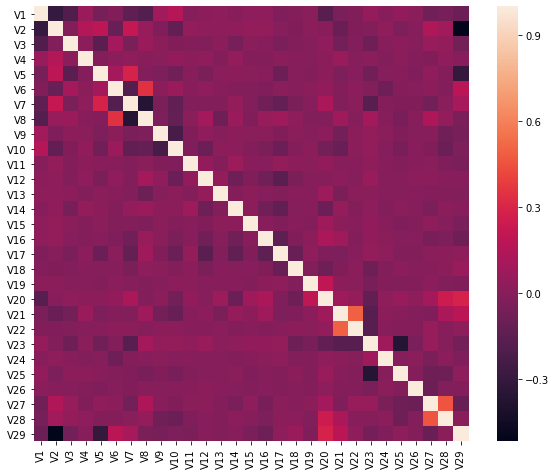

In [22]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  square=True, ax=ax)

0    24602
1      244
Name: Target, dtype: int64


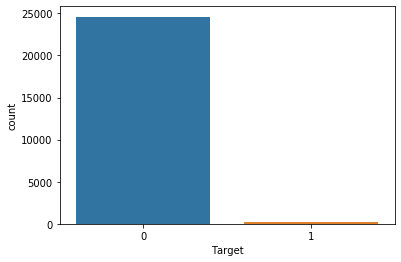

In [23]:
ax = sns.countplot(x='Target',data=data)
print(data['Target'].value_counts())

In [24]:
data['Target'] = data.Target.astype('int')

## Null value imputation and transformation using pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from sklearn.preprocessing import StandardScaler

In [26]:
house_preprocess = Pipeline([
    
    # missing data imputation 
    
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['V1','V20' ])),


    # feature Scaling
    ('scaler', StandardScaler()),
    
    

])

In [27]:
house_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['V1', 'V20'])),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [28]:
# Apply Transformations
X_train=house_preprocess.transform(X_train)
X_test=house_preprocess.transform(X_test)
test_data=house_preprocess.transform(test_data)

# BASIC ALGORITHMS

### Logistic regresion

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import fbeta_score, make_scorer
from math import sqrt
clf = LogisticRegression().fit(X_train, y_train)
params = { 'penalty':['l2'],'dual':[False], 'C':[0.001,0.005,0.01,0.05,1,5,10,50,100,500,100],
          'fit_intercept':[True,False],
           'solver':['newton-cg', 'lbfgs', 'sag']}
ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid_lg = GridSearchCV(clf, params, cv=5,scoring=ftwo_scorer, return_train_score = True)
grid_lg.fit(X_train, y_train)
X_train_preds = grid_lg.predict(X_train)

# Print Co-efficients

print()
print("Logistic Performance: ", grid_lg.score(X_test,y_test))
print("Logistic Performance: ", grid_lg.score(X_train,y_train))
print("Best parameters: {}".format(grid_lg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lg.best_score_))


D:\anaconda\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\anaconda\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\anaconda\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\anaconda\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\anaconda\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reac


Logistic Performance:  0.8213256484149856
Logistic Performance:  0.8422939068100358
Best parameters: {'C': 1, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.84


### KNN MODEL

In [236]:
# Train a KNN model with hyperparameter tuning, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(1,10), 'weights': ['uniform'], 
             'algorithm':['ball_tree'], 'leaf_size':[10,20,30]}
ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid_knn = GridSearchCV(knn, param_knn, cv=5,scoring=ftwo_scorer, return_train_score=True)
grid_knn.fit(X_train, y_train)

print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))



KNN Test Performance:  0.7848837209302324
KNN Train Performance:  0.8343337334933975
Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation score: 0.83


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
param_DT = {'criterion':['gini','entropy'],'splitter':['best','random'],"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),"max_leaf_nodes": range(2,5),
           'max_features':['auto', 'sqrt', 'log2']}

ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid_dtree = GridSearchCV(dtree, param_DT, cv=5,scoring=ftwo_scorer, return_train_score = True)
grid_dtree.fit(X_train, y_train)
print("Logistic Performance: ", grid_dtree.score(X_test,y_test))
print("Logistic Performance: ", grid_dtree.score(X_train,y_train))
print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_dtree.best_score_))


Logistic Performance:  0.7040229885057472
Logistic Performance:  0.7134637514384349
Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.67


### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring =ftwo_scorer)
grid_rf.fit(X_train,y_train)
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_rf.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best parameters are {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
print(f'Test score is {grid_rf.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8483205915857679
Best parameters are {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}
Train score is 0.8791866028708133
Test score is 0.8213256484149856


### Gradient Boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : range(1,10),
              'n_estimators' : [50],
              'learning_rate' : [0.5],
             }
grid_gd = GridSearchCV(gbc, gbc_param,cv=5,scoring=ftwo_scorer, return_train_score=True )
grid_gd.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {grid_gd.best_score_}')
print(f'Best Mean parameters are {grid_gd.best_params_}')
print(f'Train score is {grid_gd.score(X_train,y_train)}')
print(f'Test score is {grid_gd.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8068940990278406
Best Mean parameters are {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 50}
Train score is 0.8146399055489966
Test score is 0.722543352601156


### Extra trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,20),
    'criterion' :['gini', 'entropy']
}
grid_et = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_et.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_et.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_et.best_params_}')
print(f'Train score is {grid_et.score(X_train,y_train)}')
print(f'Test score is {grid_et.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8463591490710808
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'n_estimators': 100}
Train score is 0.9671746776084408
Test score is 0.8213256484149856


### Xg boost

In [39]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,0.8],
               'min_child_weight' : [1,3,5],
                'subsample':[0.6,0.8,1]
             }
grid_xgb = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = ftwo_scorer)
grid_xgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_xgb.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_xgb.best_params_}')
print(f'Train score is {grid_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_xgb.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8546160596255714
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.6}
Train score is 0.8700834326579261
Test score is 0.7971014492753623


# Cost sensitive Algorithms

### cost sensitive logistic regession

In [245]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],'penalty':['l2'],'dual':[False], 'C':[0.001,0.005,0.01,0.05,1,5,10,50,100,500,100],
          'fit_intercept':[True,False],
           'solver':['newton-cg', 'lbfgs', 'sag']
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))
print(f'Train score is {cgrid_logreg.score(X_train,y_train)}')
print(f'Test score is {cgrid_logreg.score(X_test,y_test)}')

Best parameters: {'C': 1, 'class_weight': {0: 1, 1: 1}, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Mean cross-validation score: 0.84
Train score is 0.8422939068100358
Test score is 0.8213256484149856


### cost sensitive decision tree classifier

In [249]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],'criterion':['gini','entropy'],'splitter':['best','random'],"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),"max_leaf_nodes": range(2,5),
           'max_features':['auto', 'sqrt', 'log2']
}

#apply grid search
grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_dtree.fit(X_train,y_train)

print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print(f'Train score is {grid_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_dtree.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_split': 7, 'splitter': 'best'}
Best Mean cross-validation score: 0.81
Train score is 0.8273809523809523
Test score is 0.7471264367816093


### cost sensitive random forest

In [250]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
f2_score = make_scorer(fbeta_score, beta=2)
scores = cross_val_score(rfc, X_train, y_train, scoring=f2_score, cv=cv, n_jobs=-1)

print('Mean f2_score: %.3f' % scores.mean())

Mean f2_score: 0.816


### cost sensitive xg boost

In [251]:
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))
print(f'Train score is {cgrid_xgboost.score(X_train,y_train)}')
print(f'Test score is {cgrid_xgboost.score(X_test,y_test)}')

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.85
Train score is 1.0
Test score is 0.823699421965318


### cost sensitive extra trees

In [252]:
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Mean f2: %.3f' % scores.mean())


Mean f2: 0.837


### bagging undersampling

In [253]:
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ftwo_scorer = make_scorer(fbeta_score, beta=2)

scores = cross_val_score(b_dtree, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Mean f2: %.3f' % scores.mean())

Mean f2: 0.618


# Data sampling algorithms

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn import under_sampling,over_sampling


### Data sampling logistic regression

In [255]:
#logistic regression
pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',LogisticRegression())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
   
}

#apply grid search
grid_svmsmote= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote.best_score_))
print(f'Train score is {grid_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote.score(X_test,y_test)}')

Best parameters: {'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.77
Train score is 0.8333333333333334
Test score is 0.7763157894736841


### decision tree

In [256]:
#decisiontreee
pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', DecisionTreeClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_svmsmote= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote.best_score_))
print(f'Train score is {grid_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 6, 'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.72
Train score is 0.8080808080808081
Test score is 0.7196029776674938


### knn 

In [43]:
#knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import fbeta_score, make_scorer
from math import sqrt
ftwo_scorer = make_scorer(fbeta_score, beta=2)
pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',KNeighborsClassifier(n_neighbors=6))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors':[4,5],
   
}

#apply grid search
grid_svmsmotek= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote.best_score_))
print(f'Train score is {grid_svmsmote.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmote.score(X_test,y_test)}')

Best parameters: {'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.84
Train score is 0.8712984054669705
Test score is 0.7901907356948229


### randomforest

In [54]:
#randomforest
pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',RandomForestClassifier(criterion = 'entropy', max_depth= 6, max_features= 'auto', n_estimators= 50))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
   
}

#apply grid search
grid_svmsmoter= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmoter.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmoter.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmoter.best_score_))
print(f'Train score is {grid_svmsmoter.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmoter.score(X_test,y_test)}')

                                                                            

Best parameters: {'svmsmote__k_neighbors': 3}
Best Mean cross-validation score: 0.86
Train score is 0.8830275229357798
Test score is 0.807799442896936


### Xgb

In [40]:
#xgb
pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                                n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                            
                                                                             ))])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
   
}

#apply grid search
grid_svmsmotex= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmotex.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmotex.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmotex.best_score_))
print(f'Train score is {grid_svmsmotex.score(X_train,y_train)}')
print(f'Test score is {grid_svmsmotex.score(X_test,y_test)}')

Best parameters: {'svmsmote__k_neighbors': 2}
Best Mean cross-validation score: 0.86
Train score is 1.0
Test score is 0.8380681818181818


### easy ensemble classifier

In [32]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier

pipe_rand_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model',EasyEnsembleClassifier())])
param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
   
}

#apply grid search
grid_svmsmote= GridSearchCV(pipe_rand_svmsmote, param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
grid_svmsmote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svmsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svmsmote.best_score_))

Best parameters: {'svmsmote__k_neighbors': 1}
Best Mean cross-validation score: 0.84


In [46]:
#top 5 estimators
estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),
           ('xgb',grid_xgb.best_estimator_),('xgboost',grid_svmsmotex.best_estimator_)]

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8193515453319377
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8752997601918465
Test score is 0.7971014492753623


# Extra models

In [29]:
# Naive Bayes Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
f2_score = make_scorer(fbeta_score, beta=2)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring=f2_score)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.0

Naive Algorithm Test Performance:  0.9825596994902066


In [30]:
pip install setuptools wheel numpy scipy scikit-learn -U

Requirement already up-to-date: setuptools in d:\anaconda\envs\buan6341_2020\lib\site-packages (46.2.0)
Requirement already up-to-date: wheel in d:\anaconda\envs\buan6341_2020\lib\site-packages (0.34.2)
Requirement already up-to-date: numpy in d:\anaconda\envs\buan6341_2020\lib\site-packages (1.18.4)
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
Requirement already up-to-date: scikit-learn in d:\anaconda\envs\buan6341_2020\lib\site-packages (0.22.2.post1)
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\anaconda\\envs\\buan6341_2020\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
pip install lightgbm


In [31]:
#lightgbm


from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

lgb = lgb.LGBMClassifier(random_state=42)
lgb_param = {
    'n_estimators': [200,300],
    'colsample_bytree': [0.7],
'max_depth': [6,7],
    'num_leaves': [9, 10],
    'reg_alpha': [1.1, 1.2]}

grid_lgb = GridSearchCV(lgb, lgb_param,cv=5, return_train_score=True,scoring = ftwo_scorer )
grid_lgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_lgb.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_lgb.best_params_}')
print(f'Train score is {grid_lgb.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.7972942960042918
Best Mean Cross Validation Score is {'colsample_bytree': 0.7, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 9, 'reg_alpha': 1.1}
Train score is 1.0


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

print(f'Train score is {lda.score(X_train,y_train)}')
print(f'Best Mean Cross Validation Score is {grid_lgb.best_score_}')
print(f'Test score is {lda.score(X_test,y_test)}')

Train score is 0.9976425942962281
Best Mean Cross Validation Score is 0.7972942960042918
Test score is 0.9974510330024148


In [55]:

# Preprocessing of validation data, get predictions
test_data_labels = grid_svmsmoterx.predict(test_data)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('Proj_solution_base.csv', index =False)  
print("Done :D")

Done :D
